In [1]:
from gym.wrappers import TimeLimit

from environments.simulation import ARESEAJOSS
from environments.wrappers import NormalizeAction, NormalizeObservation, ScaleReward, ScaleActuators

initializing ocelot...


In [2]:
env = ARESEAJOSS()
env = TimeLimit(env, max_episode_steps=50)
env = NormalizeAction(env)
env = NormalizeObservation(env)
env = ScaleReward(env, env.unwrapped.observation_space["achieved_goal"].high.sum() * 1e-3)
env

<ScaleReward<NormalizeObservation<NormalizeAction<TimeLimit<ARESEAJOSS instance>>>>>

In [3]:
env.observation_space

Dict(achieved_goal:Box(-1.0, 1.0, (4,), float32), desired_goal:Box(-1.0, 1.0, (4,), float32), observation:Box(-1.0, 1.0, (6,), float32))

In [4]:
env.reset()

{'observation': array([ 0.53804   , -0.88063412,  0.46555516,  0.14623214, -0.04502758,
        -0.92134259]),
 'desired_goal': array([ 0.46189833, -0.08763737,  0.1089369 ,  0.916698  ], dtype=float32),
 'achieved_goal': array([-0.33699158,  0.16187163,  0.26660484,  8.36892069])}

In [5]:
env.goal

array([ 0.00138569, -0.00013146,  0.00010894,  0.0009167 ], dtype=float32)

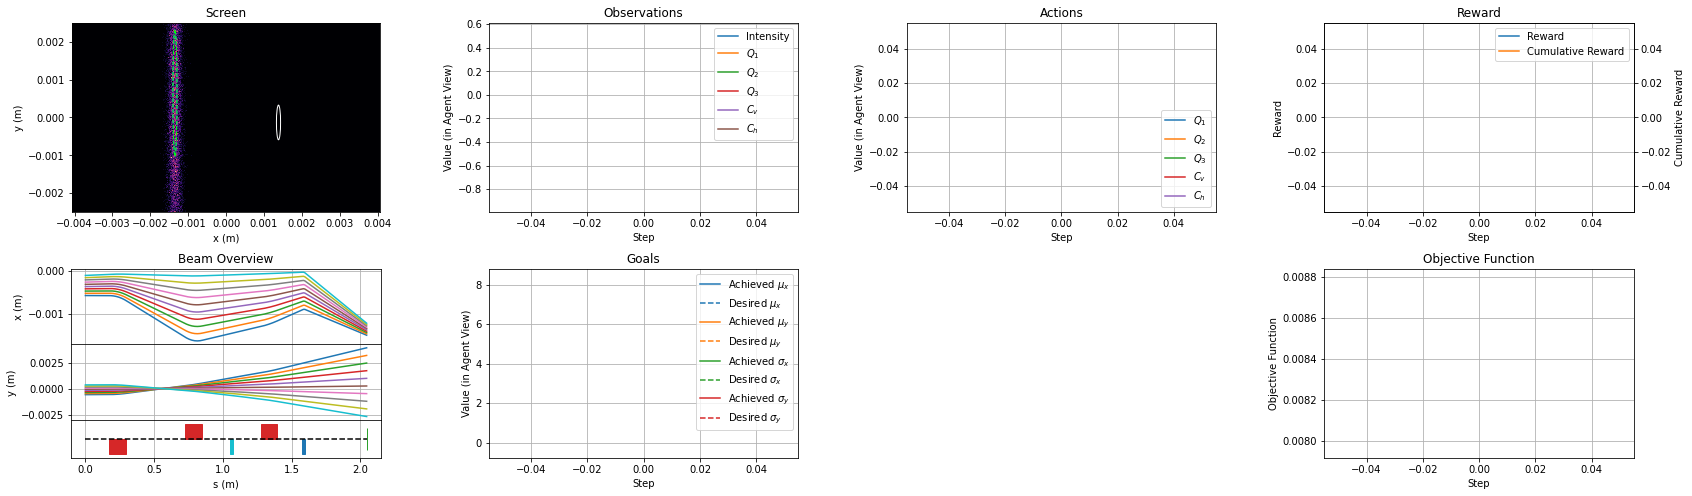

In [6]:
env.render()

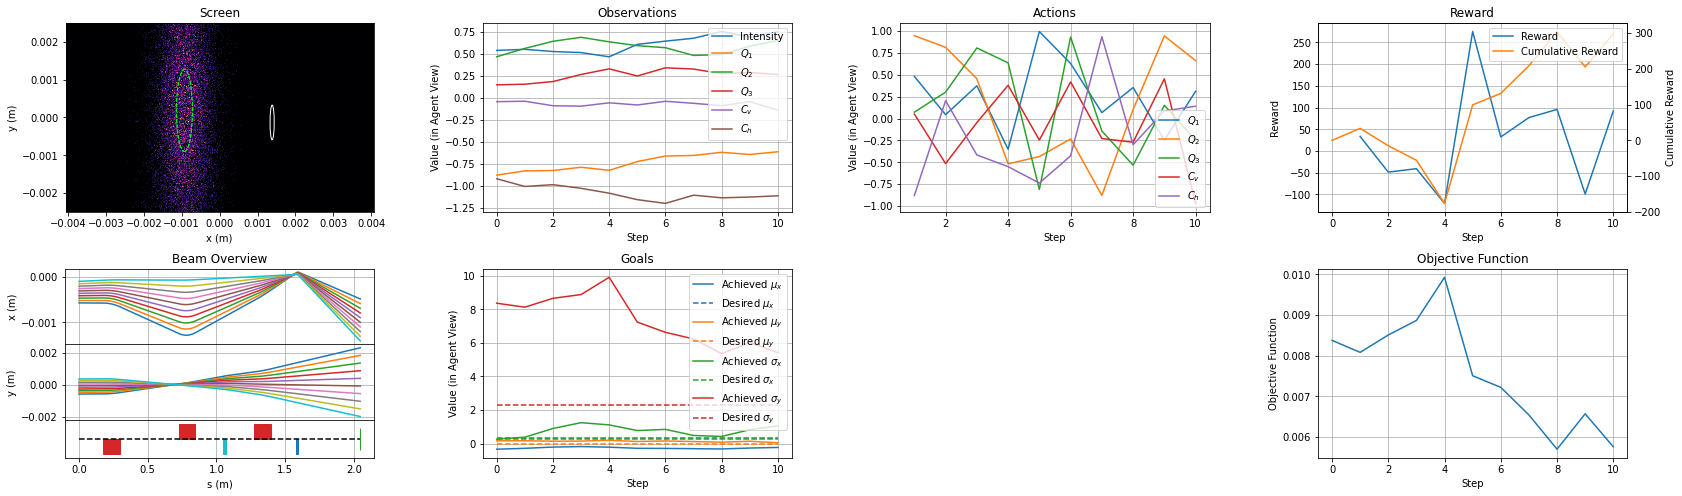

In [7]:
for _ in range(10):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # print(f"{observation[:4]}\t{reward:.5f}\t{done}")

env.render()

In [9]:
env.reset()
env.beam_parameters

array([ 0.00425798, -0.00117272,  0.00266229,  0.00028155])

In [10]:
from scipy import optimize

env = ARESEAJOSS()
env = ScaleActuators(env, env.optimization_space.high)
env.reset()

env.render()
bounds = optimize.Bounds(env.optimization_space.low, env.optimization_space.high)
x = optimize.minimize(fun=env.evaluate,
                      x0=env.initial_actuators,
                      bounds=bounds)
print(x)
env.render()

TypeError: 'NoneType' object is not subscriptable

In [10]:
env.beam_parameters

array([-9.75054913e-05, -1.45174802e-09, -7.71380050e-04, -5.73778248e-04])

In [11]:
env.actuators

array([ 9.99999168e-01,  9.99999293e-01,  9.99999850e-01,  7.87403276e-04,
       -1.72043362e-03])

In [12]:
bounds

Bounds(array([-1., -1., -1., -1., -1.], dtype=float32), array([1., 1., 1., 1., 1.], dtype=float32))

In [13]:
env.observation_space.high

array([4.e-03, 4.e-03, 4.e-04, 4.e-04, 1.e+05, 3.e+01, 3.e+01, 3.e+01,
       3.e-03, 3.e-03], dtype=float32)